In [2]:
!pip install tensorflow opencv-python matplotlib

In [3]:
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24600\3195215252.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#   tf.config.experimental.set_memory_growth(gpu, True)


In [6]:
gpus

[]

In [7]:
data_dir = 'dataset'

In [8]:
image_ext = ['jpg','jpeg','png']

## Dataset

In [12]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [13]:
import numpy as np

In [14]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 4642 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x00000213DFB970E0>)

In [17]:
batch = data_iterator.next()

In [18]:
batch

(array([[[[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [253.125   , 254.5625  , 249.5625  ],
          [249.83203 , 251.83203 , 246.83203 ],
          [246.625   , 248.625   , 243.625   ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [253.125   , 254.5625  , 249.5625  ],
          [250.8125  , 252.8125  , 247.8125  ],
          [248.25    , 250.25    , 245.25    ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [253.5625  , 255.      , 250.      ],
          [252.4375  , 254.4375  , 249.4375  ],
          [250.26172 , 252.26172 , 247.26172 ]],
 
         ...,
 
         [[254.      , 255.      , 250.      ],
          [253.062

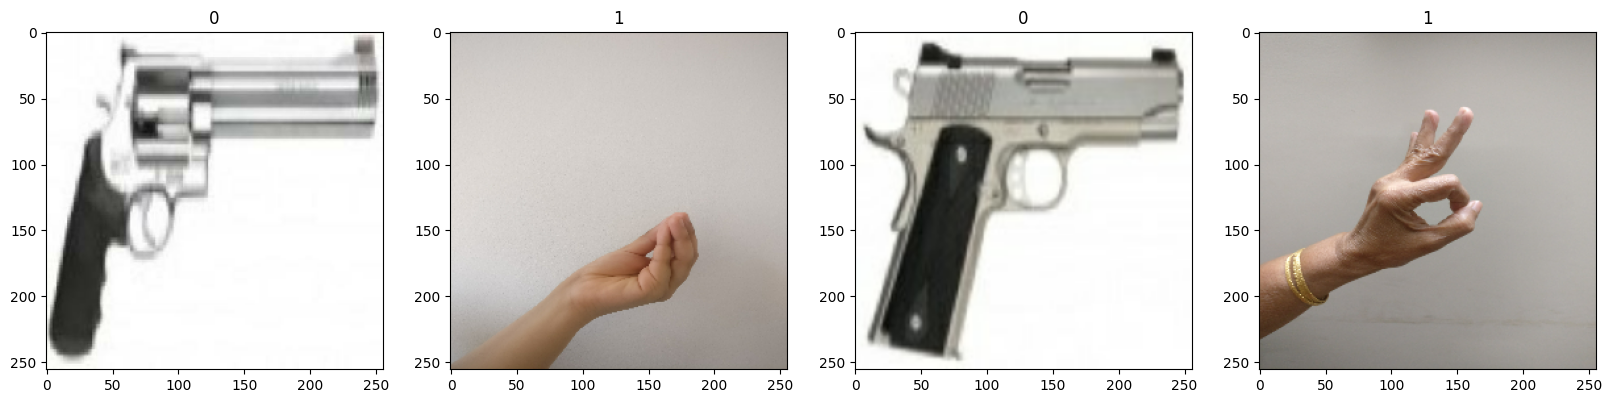

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Rifle: 1
Handgun: 0

In [20]:
scaled = batch[0] / 255

## Propressing data

In [21]:
data = data.map(lambda x, y: (x / 255, y))

In [22]:
scaled_iterator = data.as_numpy_iterator()

In [23]:
batch = scaled_iterator.next()

In [24]:
batch[0].shape

(32, 256, 256, 3)

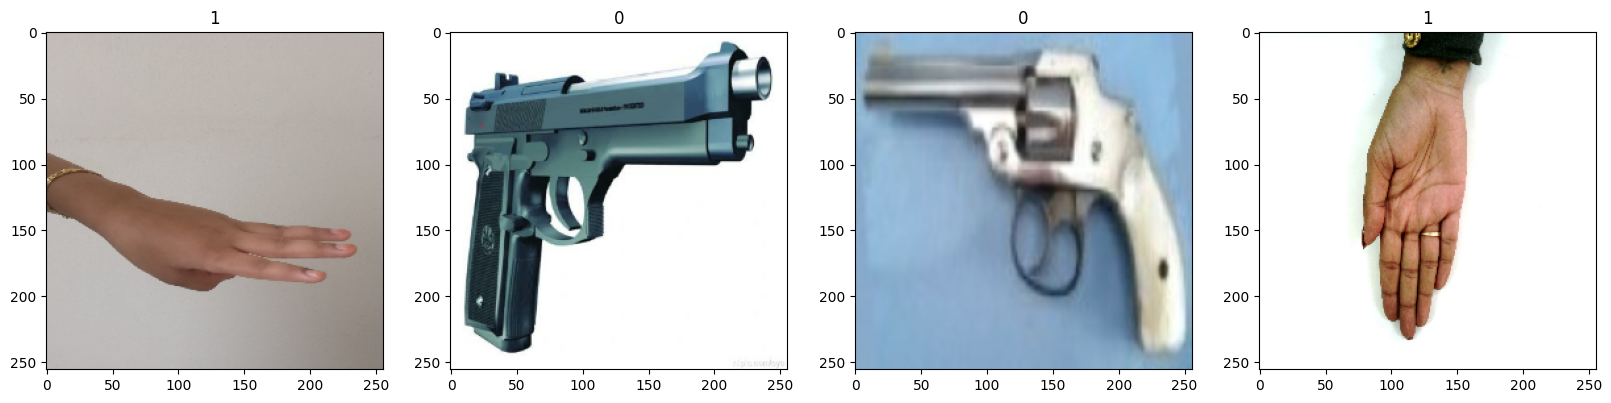

In [25]:
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## splitting data

In [26]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [28]:
len(test)

14

## Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [30]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

# model.add(Conv2D(16, (3, 3), activation='relu'))
# model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    31,490,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,495,649 (120.15 MB)

 Trainable params: 31,495,649 (120.15 MB)

 Non-trainable params: 0 (0.00 B)

## Logging model

In [33]:
logdir = 'logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

In [35]:
hist = model.fit(train, validation_data=val, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 78s 694ms/step - accuracy: 0.8380 - loss: 1.1017 - val_accuracy: 0.9494 - val_loss: 0.1168
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 71s 694ms/step - accuracy: 0.9869 - loss: 0.0455 - val_accuracy: 0.9903 - val_loss: 0.0313
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 71s 695ms/step - accuracy: 0.9974 - loss: 0.0121 - val_accuracy: 0.9935 - val_loss: 0.0286
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 71s 697ms/step - accuracy: 0.9978 - loss: 0.0066 - val_accuracy: 0.9892 - val_loss: 0.0357
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 71s 698ms/step - accuracy: 0.9940 - loss: 0.0156 - val_accuracy: 0.9817 - val_loss: 0.0605
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 71s 694ms/step - accuracy: 0.9932 - loss: 0.0206 - val_accuracy: 0.9871 - val_loss: 0.0550
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 71s 696ms/step - accuracy: 0.9999 - loss: 0.0035 - val_accuracy: 0.9935 - val_loss: 0.0349
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 71s 695ms/step - accuracy: 1.0000 - loss: 0

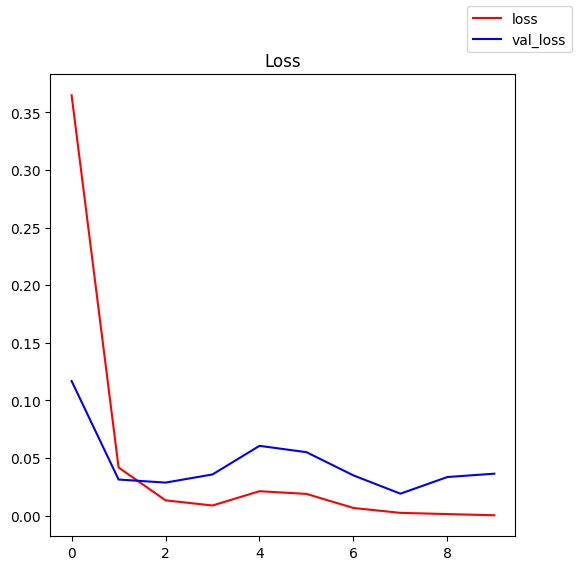

In [36]:
fig = plt.figure(figsize=(6, 6))
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
plt.title('Loss')
fig.legend()
plt.show()


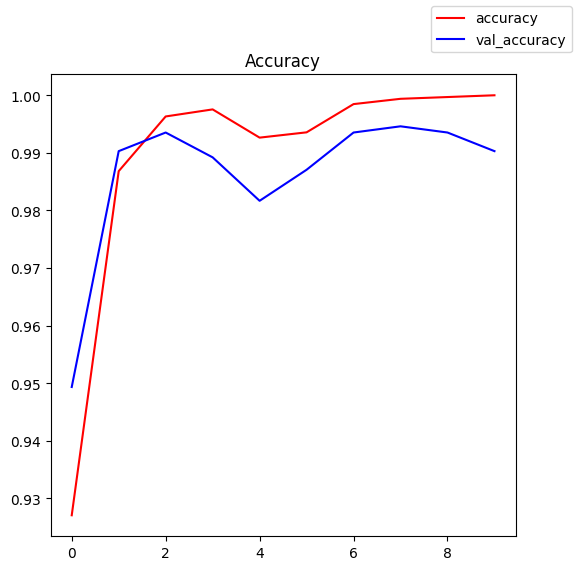

In [37]:
fig = plt.figure(figsize=(6, 6))
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
plt.title('Accuracy')
fig.legend()
plt.show()


## Accuracy Metrics

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    pre.update_state(y, y_pred)
    rec.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [41]:
print('Precision: ', pre.result().numpy())
print('Recall: ', rec.result().numpy())
print('Accuracy: ', acc.result().numpy())

Precision:  0.9832636
Recall:  0.9957627
Accuracy:  0.98883927


## Self Test

In [42]:
import cv2

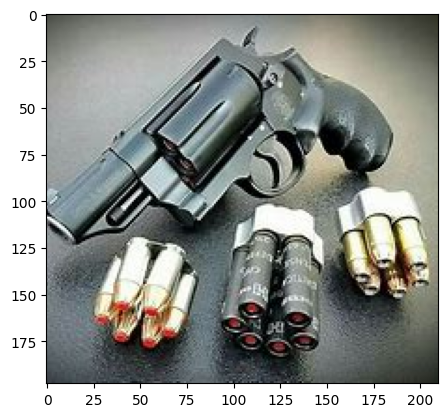

In [43]:
img = cv2.imread('image.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
resize = tf.image.resize(img, (256, 256))

In [45]:
y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [46]:
if y_pred[0][0] < 0.5:
    print('Gun')
else:
    print('Hand')

Gun


## Save Model

In [47]:
from tensorflow.keras.models import load_model

# model.save(os.path.join('models', 'gun_detector.h5'))